In [23]:
import pandas as pd

df = pd.read_csv("preprocessed_content.csv")

print(df.head())

   Unnamed: 0          filename ticker  year  \
0           0  ASX_BSX_2020.pdf    BSX  2020   
1           1  ASX_BSX_2022.pdf    BSX  2022   
2           2  ASX_EXR_2022.pdf    EXR  2022   
3           3  LSE_ADM_2019.pdf    ADM  2019   
4           4  LSE_ADM_2020.pdf    ADM  2020   

                                preprocessed_content  \
0  style guide colour colour use imagecolour prof...   
1  sustainability report look mining green office...   
2  report environment social governance esg basel...   
3  corporate social responsibilty report introduc...   
4  sustainability admiral commit maintain respons...   

                                        ner_entities  e_score  s_score  \
0  ['bk%', 'rgb', 'un', 'el ectric mine consortiu...     3.16    18.00   
1  ['murray street', 'west perth', 'west perth', ...     2.83    12.86   
2  ['september', 'mongolia', 'australia', 'austra...     3.81     4.28   
3  ['david stevens', 'csr board', 'just over  yea...    16.38    14.20   
4  [

In [24]:
# Create unique ID for ticker and year
df['ticker_year'] = df.apply(lambda row: f"{row['ticker']}_{row['year']}", axis=1)
df['ticker_year'].head(5)

0    BSX_2020
1    BSX_2022
2    EXR_2022
3    ADM_2019
4    ADM_2020
Name: ticker_year, dtype: object

# Phase 1: Exploratory Data Analysis

TF-IDF Analysis : Identifying frequently discussed topics and relevant words across sustainability reports using Term Frequency-Inverse Document Frequency (TF-IDF) to uncover dominant themes and concepts within reports.

Word Cloud Visualizations: Creating word clouds for the overall corpus and by individual ESG components (E, S, and G) to visually highlight frequently occurring words.

Optional: Correlation heatmaps of ESG scores, score distributions, and frequency histograms for each ESG component will help identify patterns across years, industries, and companies

### Statistical Overview of ESG Scores

Descriptive Statistics for ESG Scores:
          e_score     s_score     g_score  total_score
count  866.000000  866.000000  866.000000   866.000000
mean     5.904134   10.272229    7.423741    23.612240
std      5.684071    4.013380    2.532303     7.574159
min      0.010000    1.280000    3.160000     6.990000
25%      1.662500    7.542500    5.622500    17.822500
50%      3.735000    9.855000    6.820000    22.710000
75%      9.027500   12.875000    8.640000    28.760000
max     24.840000   26.870000   16.470000    46.510000


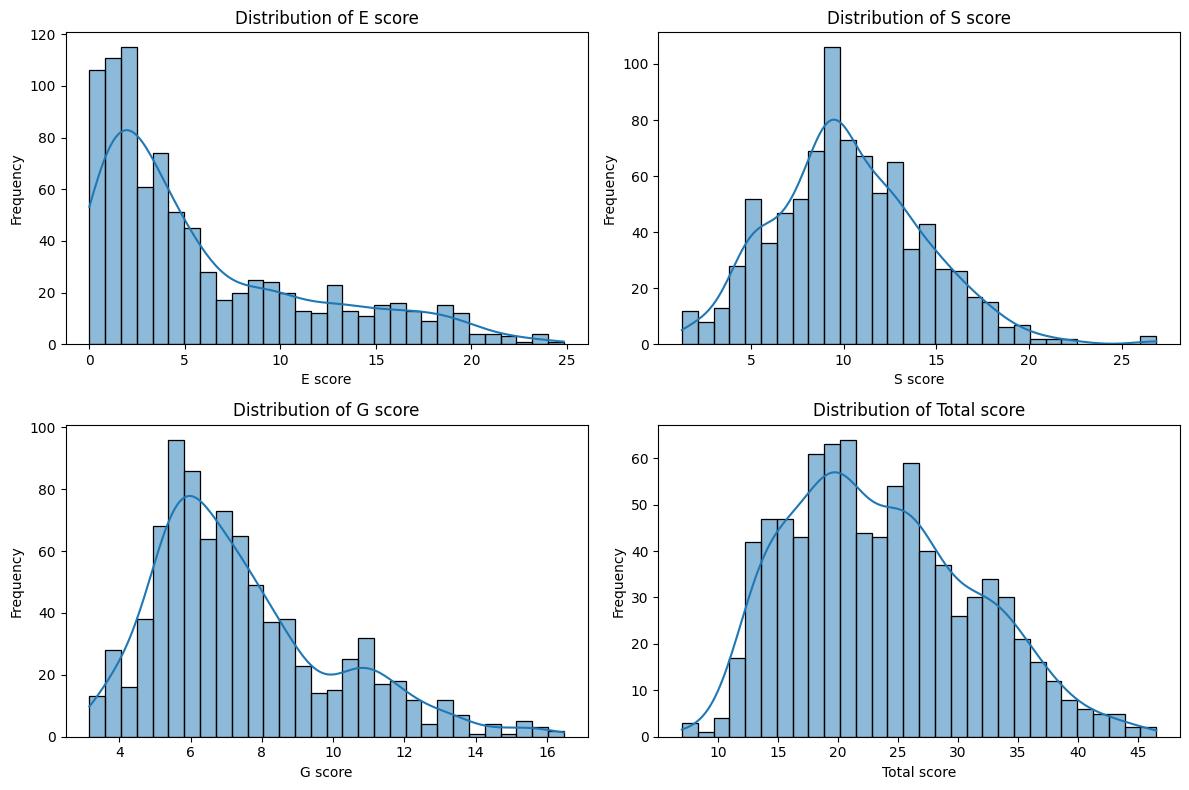

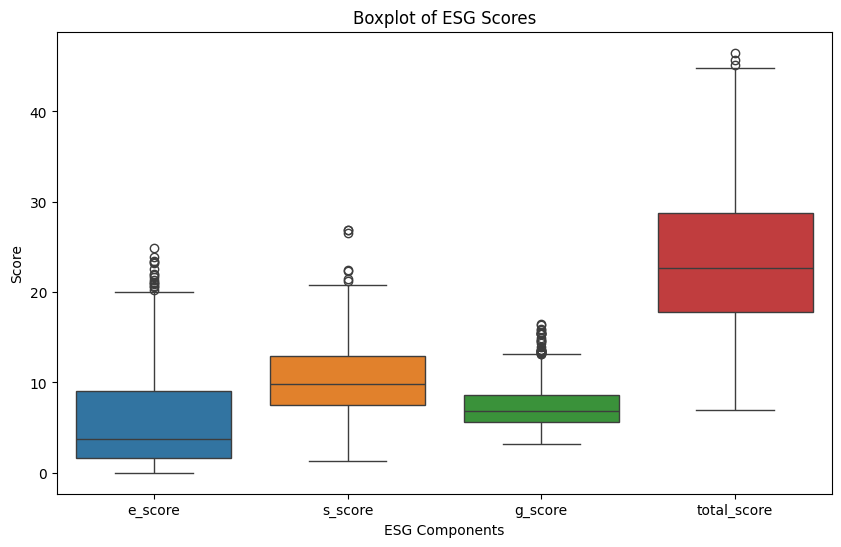

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic descriptive statistics for ESG scores
esg_scores = df[['e_score', 's_score', 'g_score', 'total_score']]
print("Descriptive Statistics for ESG Scores:")
print(esg_scores.describe())

# Plot histograms for each ESG component and total score
plt.figure(figsize=(12, 8))
for i, score in enumerate(['e_score', 's_score', 'g_score', 'total_score'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[score], kde=True, bins=30)
    plt.title(f"Distribution of {score.replace('_', ' ').capitalize()}")
    plt.xlabel(score.replace('_', ' ').capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Optional: Boxplot to show score distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=esg_scores)
plt.title("Boxplot of ESG Scores")
plt.xlabel("ESG Components")
plt.ylabel("Score")
plt.show()

### Correlational Analysis

Correlation Matrix for ESG Scores:
              e_score   s_score   g_score  total_score
e_score      1.000000 -0.029369 -0.158549     0.682293
s_score     -0.029369  1.000000  0.412967     0.645694
g_score     -0.158549  0.412967  1.000000     0.433859
total_score  0.682293  0.645694  0.433859     1.000000


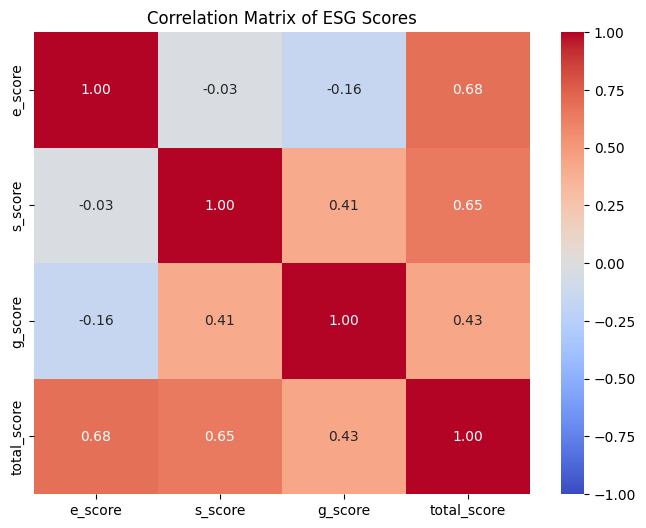

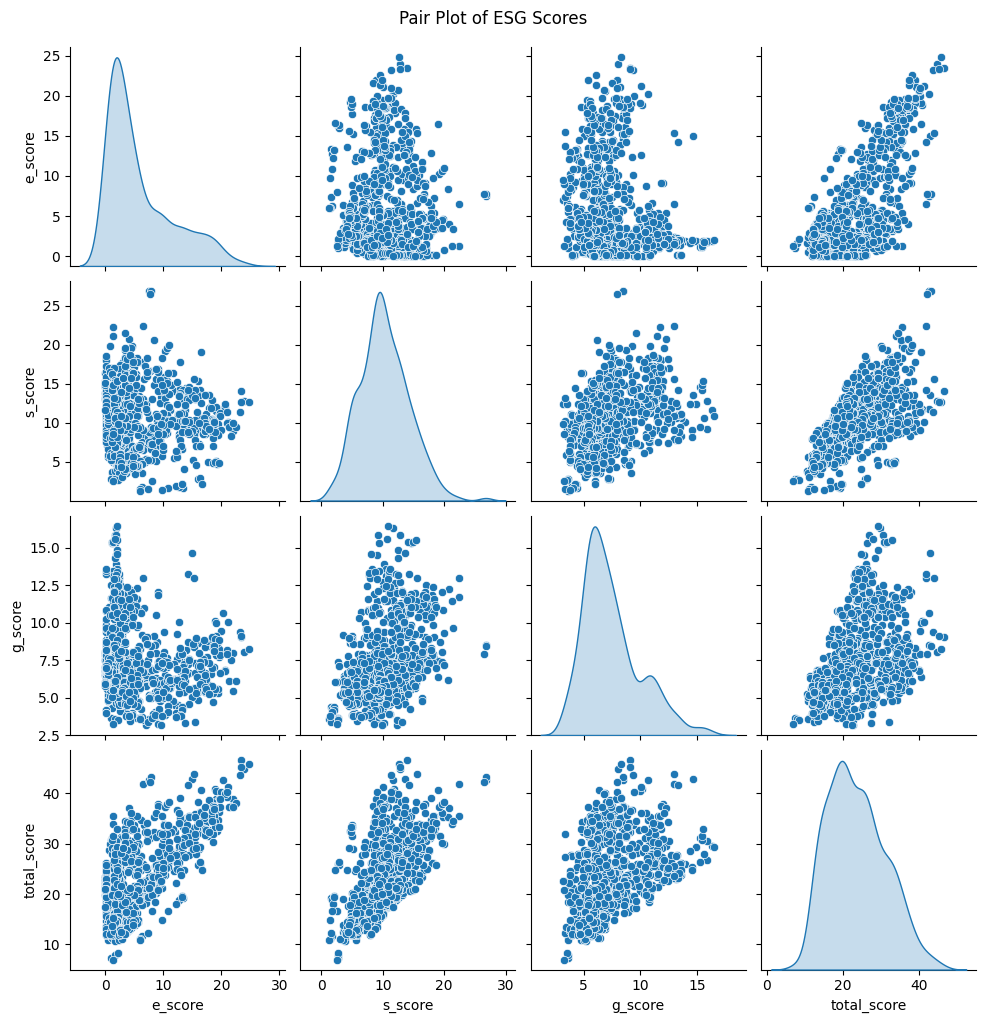

In [26]:
# Calculate the correlation matrix for ESG scores
correlation_matrix = df[['e_score', 's_score', 'g_score', 'total_score']].corr()
print("Correlation Matrix for ESG Scores:")
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of ESG Scores")
plt.show()

# Optional: Pair Plot to explore pairwise relationships visually
sns.pairplot(df[['e_score', 's_score', 'g_score', 'total_score']], diag_kind='kde')
plt.suptitle("Pair Plot of ESG Scores", y=1.02)  # y=1.02 adjusts the title position slightly upward
plt.show()

### Temporal Trends

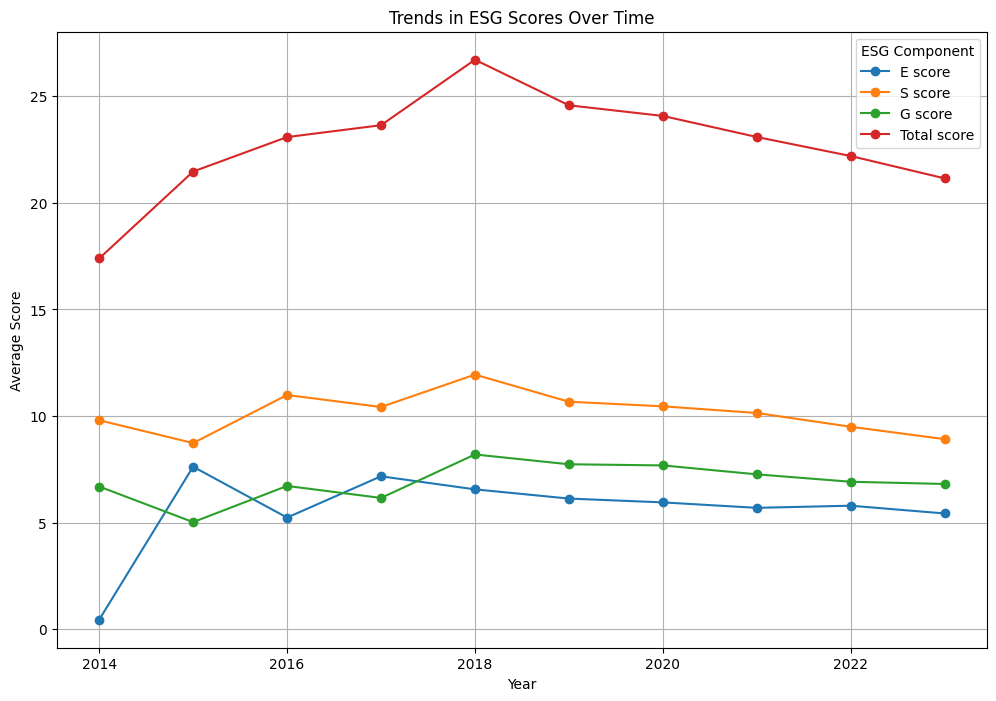

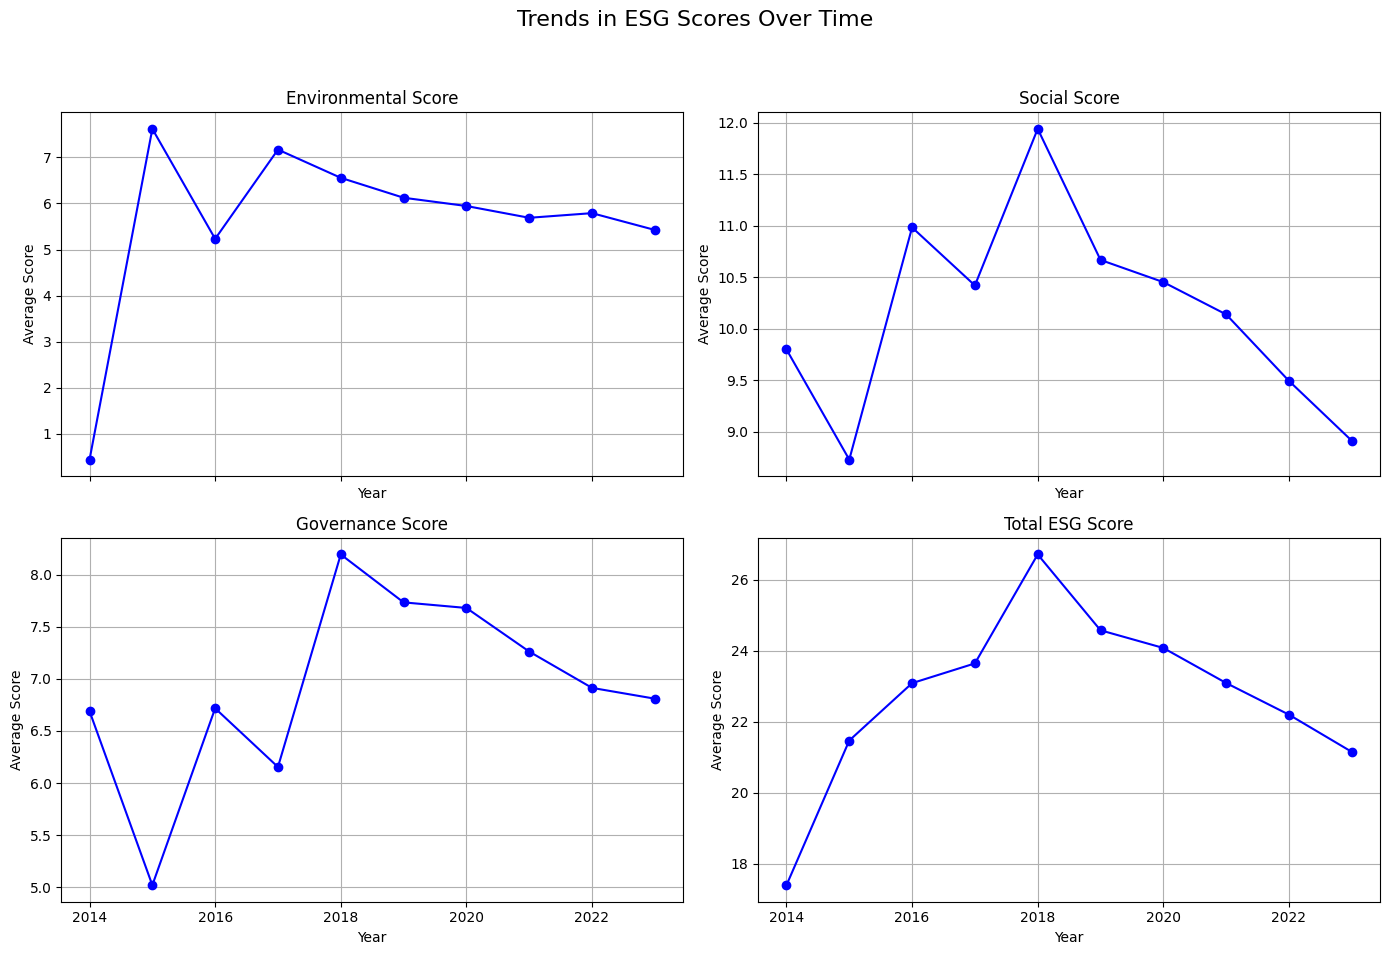

In [27]:
# Ensure the 'year' column is of integer type (in case it's read as a string)
df['year'] = df['year'].astype(int)

# Calculate average ESG scores for each year
yearly_trends = df.groupby('year')[['e_score', 's_score', 'g_score', 'total_score']].mean()

# Plotting trends over time for each ESG component and total score
plt.figure(figsize=(12, 8))
for score in ['e_score', 's_score', 'g_score', 'total_score']:
    plt.plot(yearly_trends.index, yearly_trends[score], marker='o', label=score.replace('_', ' ').capitalize())

plt.title("Trends in ESG Scores Over Time")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend(title="ESG Component")
plt.grid(True)
plt.show()

# Plotting individual trends for each ESG component and total score
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
fig.suptitle("Trends in ESG Scores Over Time", fontsize=16)

scores = ['e_score', 's_score', 'g_score', 'total_score']
titles = ['Environmental Score', 'Social Score', 'Governance Score', 'Total ESG Score']

for i, (score, title) in enumerate(zip(scores, titles)):
    ax = axes[i//2, i%2]
    ax.plot(yearly_trends.index, yearly_trends[score], marker='o', linestyle='-', color='b')
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Score")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

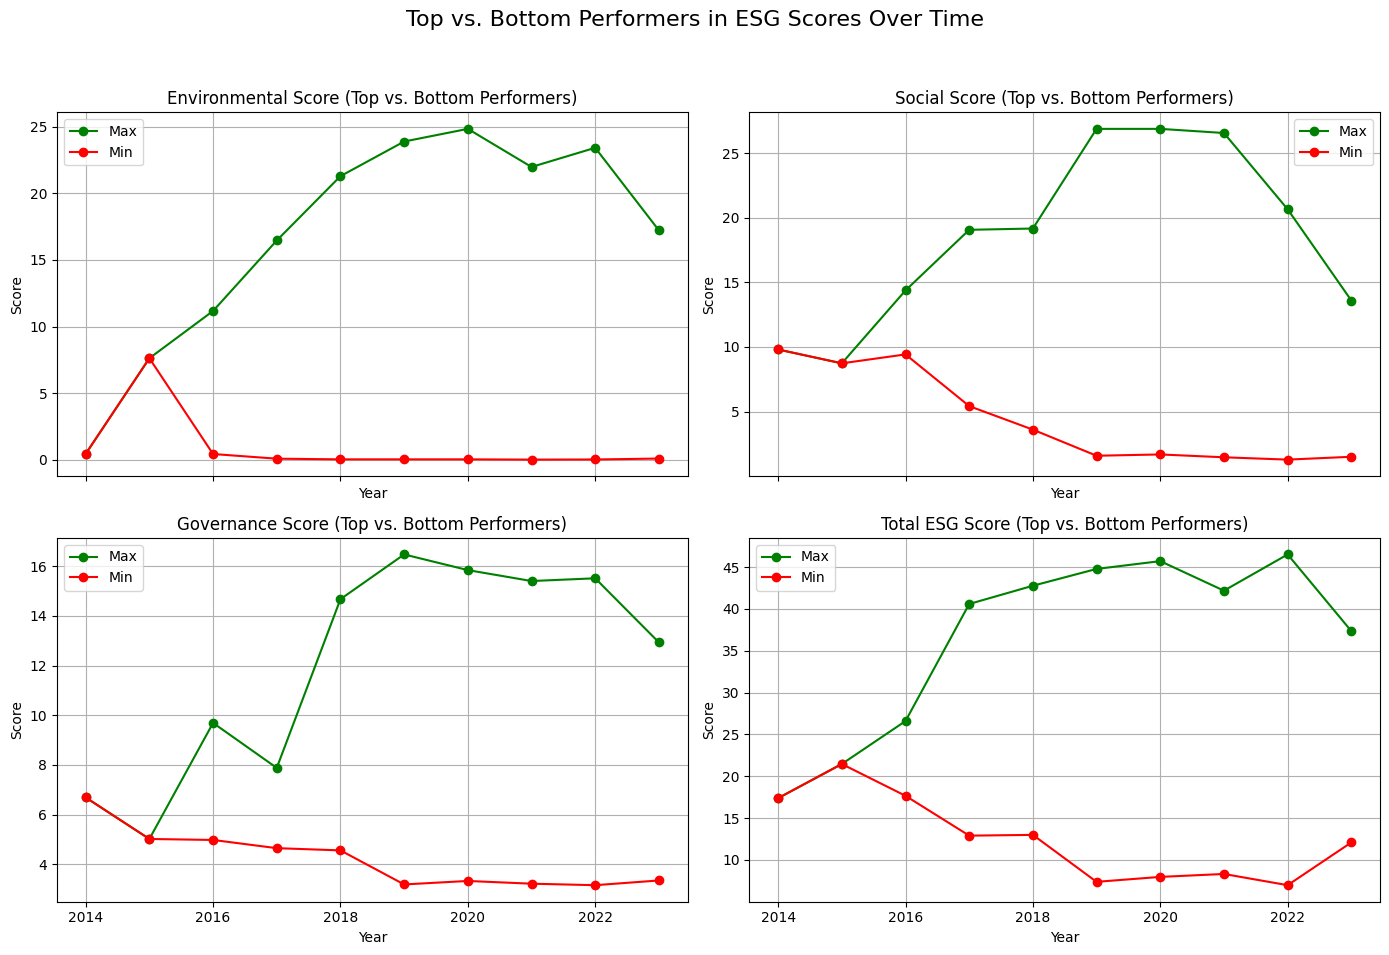

In [28]:
# Finding top and bottom performers by year
top_bottom_trends = df.groupby('year')[['e_score', 's_score', 'g_score', 'total_score']].agg(['max', 'min'])

# Plotting top vs. bottom performers over time for each ESG component
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
fig.suptitle("Top vs. Bottom Performers in ESG Scores Over Time", fontsize=16)

for i, (score, title) in enumerate(zip(scores, titles)):
    ax = axes[i//2, i%2]
    ax.plot(top_bottom_trends.index, top_bottom_trends[(score, 'max')], marker='o', linestyle='-', color='green', label="Max")
    ax.plot(top_bottom_trends.index, top_bottom_trends[(score, 'min')], marker='o', linestyle='-', color='red', label="Min")
    ax.set_title(f"{title} (Top vs. Bottom Performers)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Score")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Overall TF-IDF Analysis

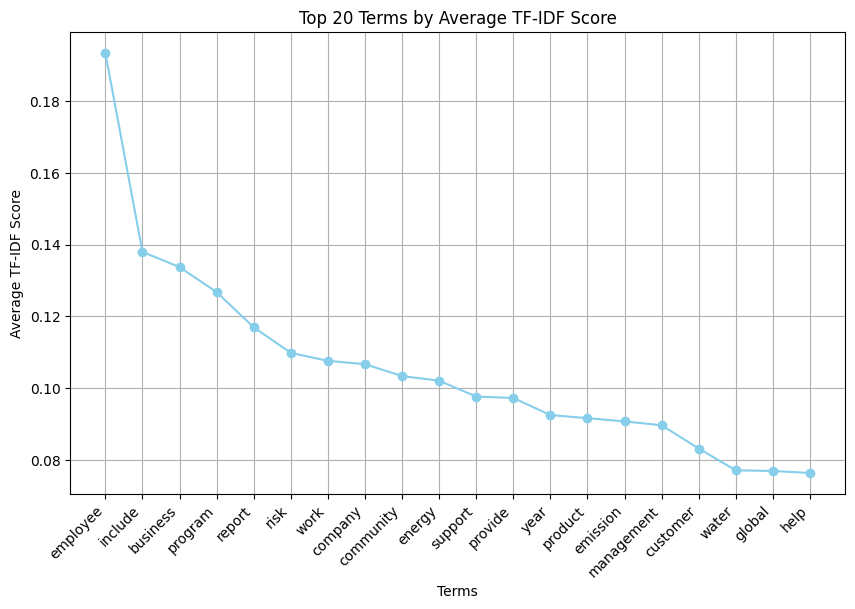

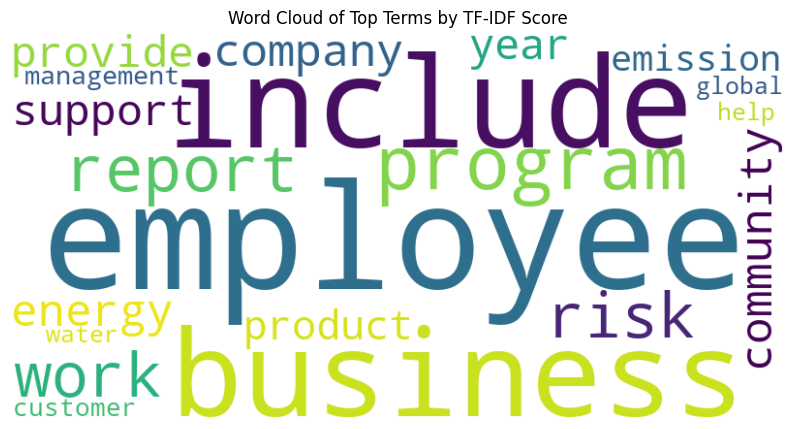

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the 'preprocessed_content' column
text_data = df['preprocessed_content']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features for more/fewer terms if needed

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display top terms by average TF-IDF score
top_terms = tfidf_df.mean().sort_values(ascending=False).head(20)
#print("Top 20 terms by TF-IDF score:\n", top_terms)

import matplotlib.pyplot as plt

# Plotting the frequency distribution of top 20 terms as a line plot
plt.figure(figsize=(10, 6))
plt.plot(top_terms.index, top_terms.values, marker='o', linestyle='-', color='skyblue')
plt.title("Top 20 Terms by Average TF-IDF Score")
plt.xlabel("Terms")
plt.ylabel("Average TF-IDF Score")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

from wordcloud import WordCloud

# Convert top terms into a dictionary for word cloud input
top_terms_dict = top_terms.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_terms_dict)

# Display the word cloud (with higher average TF-IDF scores appearing larger)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Terms by TF-IDF Score")
plt.show()

### Keyword Analysis for Each ESG Component

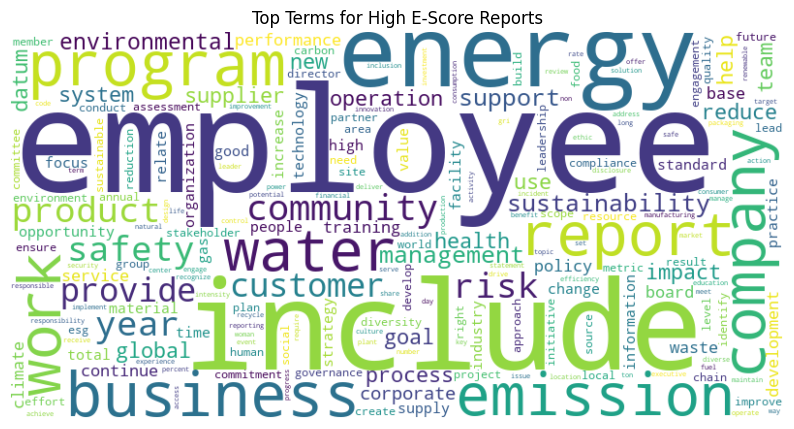

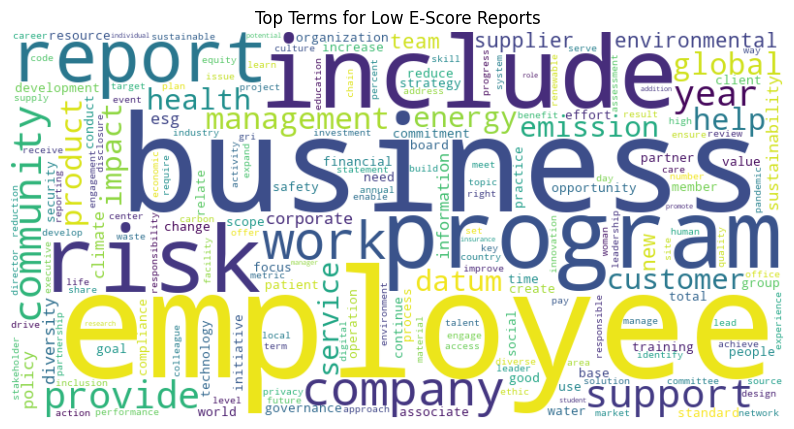

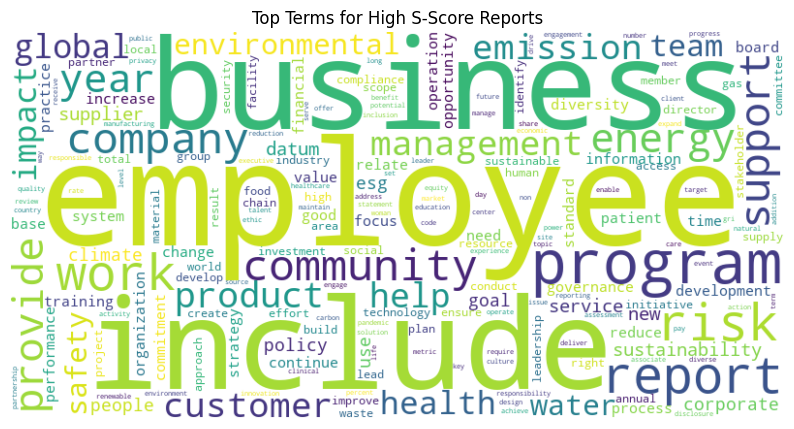

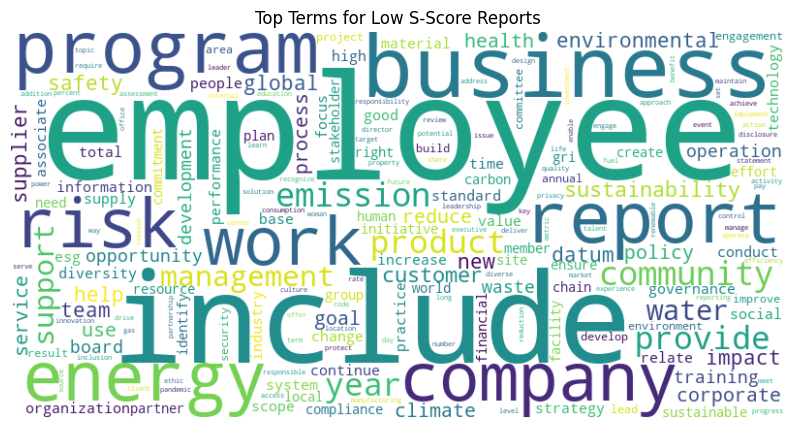

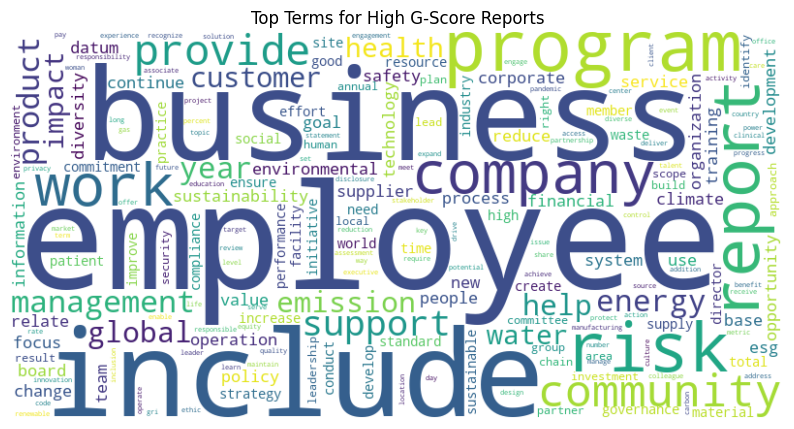

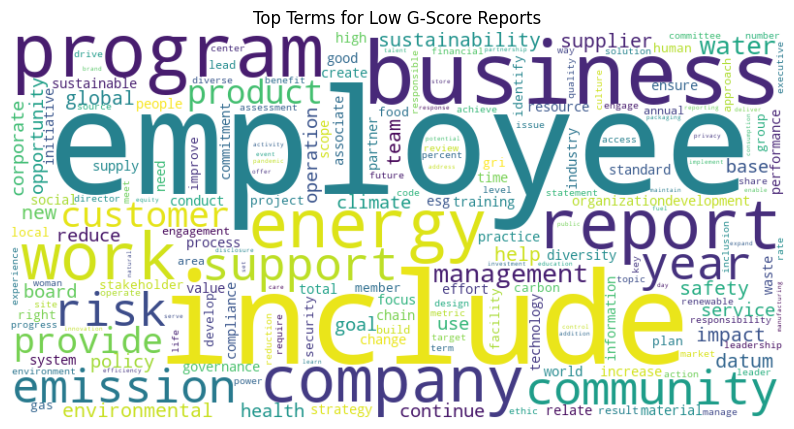

In [30]:
# -----------Component Specific TF-IDF Analysis--------------
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Define high and low categories based on median values
# Define high and low categories based on median values
median_e = df['e_score'].median()
median_s = df['s_score'].median()
median_g = df['g_score'].median()

# Split the data into high and low groups for each ESG component
high_e = df[df['e_score'] >= median_e]['preprocessed_content']
low_e = df[df['e_score'] < median_e]['preprocessed_content']

high_s = df[df['s_score'] >= median_s]['preprocessed_content']
low_s = df[df['s_score'] < median_s]['preprocessed_content']

high_g = df[df['g_score'] >= median_g]['preprocessed_content']
low_g = df[df['g_score'] < median_g]['preprocessed_content']

# Function to get TF-IDF terms as a dictionary for word cloud input
def get_tfidf_dict(text_series):
    tfidf = TfidfVectorizer(max_features=1000)
    tfidf_matrix = tfidf.fit_transform(text_series)
    tfidf_scores = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
    top_terms = tfidf_scores.mean().sort_values(ascending=False)
    return top_terms.to_dict()

# Generate and display word clouds
def plot_wordcloud(tfidf_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# High and low E-score word clouds
plot_wordcloud(get_tfidf_dict(high_e), "Top Terms for High E-Score Reports")
plot_wordcloud(get_tfidf_dict(low_e), "Top Terms for Low E-Score Reports")

# High and low S-score word clouds
plot_wordcloud(get_tfidf_dict(high_s), "Top Terms for High S-Score Reports")
plot_wordcloud(get_tfidf_dict(low_s), "Top Terms for Low S-Score Reports")

# High and low G-score word clouds
plot_wordcloud(get_tfidf_dict(high_g), "Top Terms for High G-Score Reports")
plot_wordcloud(get_tfidf_dict(low_g), "Top Terms for Low G-Score Reports")

### Frequent Phrases and Bigram Analysis

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Define a function to get top N-grams (bigrams or trigrams)
def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=20):
    # Initialize the CountVectorizer for bigrams or trigrams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(corpus)
    
    # Sum up the occurrences of each n-gram and get the top ones
    ngram_counts = X.toarray().sum(axis=0)
    ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))
    top_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return top_ngrams

# Get top bigrams and trigrams
top_bigrams = get_top_ngrams(df['preprocessed_content'], ngram_range=(2, 2), top_n=20)
top_trigrams = get_top_ngrams(df['preprocessed_content'], ngram_range=(3, 3), top_n=20)

# Display the top bigrams and trigrams
print("Top 20 Bigrams:\n", top_bigrams)
print("\nTop 20 Trigrams:\n", top_trigrams)

Top 20 Bigrams:
 [('supply chain', 15969), ('human right', 12201), ('climate change', 10847), ('health safety', 10122), ('long term', 8938), ('scope emission', 8297), ('risk management', 8045), ('renewable energy', 7439), ('climate relate', 7351), ('team member', 7229), ('board director', 6722), ('sustainability report', 6579), ('natural gas', 6363), ('environmental social', 6097), ('greenhouse gas', 5869), ('code conduct', 5422), ('corporate governance', 5338), ('corporate responsibility', 5128), ('metric ton', 5100), ('product service', 4910)]

Top 20 Trigrams:
 [('climate relate risk', 3679), ('greenhouse gas emission', 3165), ('environmental social governance', 3148), ('diversity equity inclusion', 2060), ('relate risk opportunity', 1874), ('sustainable development goal', 1736), ('chief executive officer', 1615), ('corporate responsibility report', 1560), ('code business conduct', 1526), ('corporate social responsibility', 1462), ('occupational health safety', 1462), ('relate finan

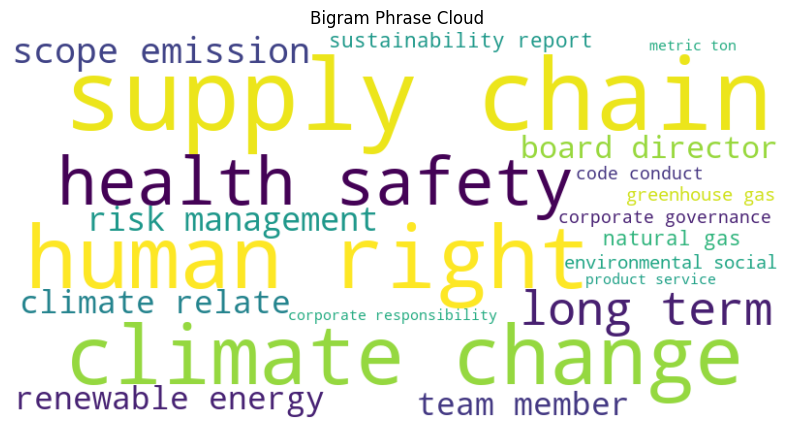

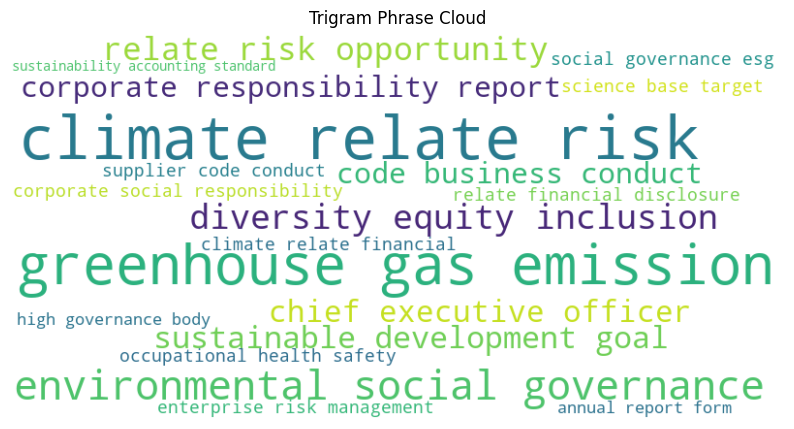

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert top bigrams and trigrams to a dictionary for the word cloud
bigram_dict = dict(top_bigrams)
trigram_dict = dict(top_trigrams)

# Function to create and display word clouds
def plot_wordcloud(ngram_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(ngram_dict)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plotting word clouds for bigrams and trigrams
plot_wordcloud(bigram_dict, "Bigram Phrase Cloud")
plot_wordcloud(trigram_dict, "Trigram Phrase Cloud")

# Phase 2: Doc2Vec Representation

Doc2Vec Model Training: Doc2Vec will be used to create a document-level vector for each report. This approach is suitable for capturing each report’s context and content structure in a single vector, ideal for downstream predictive modeling.

Clustering Analysis (Optional): Using clustering algorithms (such as K-means or hierarchical clustering) on Doc2Vec vectors, we can examine whether reports naturally group into clusters that reflect distinct sustainability themes or industry-specific focus areas.

In [13]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [33]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer if needed
nltk.download('punkt')

# Step 1: Prepare Data for Doc2Vec by tokenizing and tagging
tagged_data = [
    TaggedDocument(words=word_tokenize(row['preprocessed_content'].lower()), tags=[str(index)])
    for index, row in df.iterrows()
]

# Just use basic vectors from Doc2Vec then train on MLP
# Based on performance in MLP, we can fine-tune our Doc2Vec using our preprocessed_content
# Mean-squared errors
# Range of errors

# Can do further analysis and look at outliers to determine what terms may be (also look at language)
# Differentiate

# Step 2: Initialize and Train Doc2Vec Model
# Set parameters for Doc2Vec model
model = Doc2Vec(
    vector_size=100,    # Size of the document vector
    window=5,           # Context window size
    min_count=2,        # Ignores all words with total frequency lower than this
    workers=4,          # Number of worker threads
    epochs=40           # Number of training epochs
)

# Build vocabulary
model.build_vocab(tagged_data)

# Train the model
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Step 3: Generate Document Vectors
# Create a new column in the DataFrame to store document vectors
df['doc_vector'] = df.apply(lambda row: model.infer_vector(word_tokenize(row['preprocessed_content'].lower())), axis=1)

# Display the document vectors for each report
print(df[['ticker_year', 'doc_vector']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christophercalderwood/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  ticker_year                                         doc_vector
0    BSX_2020  [3.366724, -2.8746328, -0.80943096, 1.0760212,...
1    BSX_2022  [3.232977, -3.0917828, -0.46554154, 1.238194, ...
2    EXR_2022  [3.34775, -4.81324, -1.9987023, 2.249842, 0.78...
3    ADM_2019  [-3.1858444, -2.6572187, -0.9786926, 2.5814266...
4    ADM_2020  [-1.8932562, -3.2431083, -1.8171448, 1.5046006...


In [35]:
print(df[['ticker_year', 'filename', 'doc_vector']].info())
df_original = df.copy()
df_original.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ticker_year  866 non-null    object
 1   filename     866 non-null    object
 2   doc_vector   866 non-null    object
dtypes: object(3)
memory usage: 20.4+ KB
None


Unnamed: 0          filename ticker  year  \
0           0  ASX_BSX_2020.pdf    BSX  2020   
1           1  ASX_BSX_2022.pdf    BSX  2022   
2           2  ASX_EXR_2022.pdf    EXR  2022   
3           3  LSE_ADM_2019.pdf    ADM  2019   
4           4  LSE_ADM_2020.pdf    ADM  2020   

                                preprocessed_content  \
0  style guide colour colour use imagecolour prof...   
1  sustainability report look mining green office...   
2  report environment social governance esg basel...   
3  corporate social responsibilty report introduc...   
4  sustainability admiral commit maintain respons...   

                                        ner_entities  e_score  s_score  \
0  ['bk%', 'rgb', 'un', 'el ectric mine consortiu...     3.16    18.00   
1  ['murray street', 'west perth', 'west perth', ...     2.83    12.86   
2  ['september', 'mongolia', 'australia', 'austra...     3.81     4.28   
3  ['david stevens', 'csr board', 'just over  yea...    16.38    14.20   
4  ['year', 'health & wellbeing', 'a -month', 'on...    15.89    13.51   

   g_score  total_score ticker_year  \
0    11.83        32.98    BSX_2020   
1    10.32        26.02    BSX_2022   
2     5.86        13.94    EXR_2022   
3     5.90        36.36    ADM_2019   
4     5.38        34.78    ADM_2020   

                                          doc_vector  
0  [3.366724, -2.8746328, -0.80943096, 1.0760212,...  
1  [3.232977, -3.0917828, -0.46554154, 1.238194, ...  
2  [3.34775, -4.81324, -1.9987023, 2.249842, 0.78...  
3  [-3.1858444, -2.6572187, -0.9786926, 2.5814266...  
4  [-1.8932562, -3.2431083, -1.8171448, 1.5046006...

In [ ]:
df.drop(columns=['Unnamed: 0', 'filename', 'ticker', 'year', 'preprocessed_content', 'ner_entities', 'ticker_year'], inplace=True)
df_v1 = df.copy()

   e_score  s_score  g_score  total_score  \
0     3.16    18.00    11.83        32.98   
1     2.83    12.86    10.32        26.02   
2     3.81     4.28     5.86        13.94   
3    16.38    14.20     5.90        36.36   
4    15.89    13.51     5.38        34.78   

                                          doc_vector  
0  [3.366724, -2.8746328, -0.80943096, 1.0760212,...  
1  [3.232977, -3.0917828, -0.46554154, 1.238194, ...  
2  [3.34775, -4.81324, -1.9987023, 2.249842, 0.78...  
3  [-3.1858444, -2.6572187, -0.9786926, 2.5814266...  
4  [-1.8932562, -3.2431083, -1.8171448, 1.5046006...   

    e_score  s_score  g_score  total_score  \
0     3.16    18.00    11.83        32.98   
1     2.83    12.86    10.32        26.02   
2     3.81     4.28     5.86        13.94   
3    16.38    14.20     5.90        36.36   
4    15.89    13.51     5.38        34.78   

                                          doc_vector  
0  [3.366724, -2.8746328, -0.80943096, 1.0760212,...  
1  [3.232977, -

In [57]:
df = df_v1.copy()
print(df.head(), "\n")

df["doc_vector"] = df["doc_vector"].apply(lambda x: "[" + ", ".join(f"{i}" for i in x) + "]")
#print(df["doc_vector"])
print("\nDoc Vector converted to Strings:\n", df.head())

   e_score  s_score  g_score  total_score  \
0     3.16    18.00    11.83        32.98   
1     2.83    12.86    10.32        26.02   
2     3.81     4.28     5.86        13.94   
3    16.38    14.20     5.90        36.36   
4    15.89    13.51     5.38        34.78   

                                          doc_vector  
0  [3.366724, -2.8746328, -0.80943096, 1.0760212,...  
1  [3.232977, -3.0917828, -0.46554154, 1.238194, ...  
2  [3.34775, -4.81324, -1.9987023, 2.249842, 0.78...  
3  [-3.1858444, -2.6572187, -0.9786926, 2.5814266...  
4  [-1.8932562, -3.2431083, -1.8171448, 1.5046006...   


Doc Vector converted to Strings:
    e_score  s_score  g_score  total_score  \
0     3.16    18.00    11.83        32.98   
1     2.83    12.86    10.32        26.02   
2     3.81     4.28     5.86        13.94   
3    16.38    14.20     5.90        36.36   
4    15.89    13.51     5.38        34.78   

                                          doc_vector  
0  [3.3667240142822266, -2.874632835

In [58]:
df.to_csv('cleaned_Doc2Vec_v1.csv', index=False)

# Phase 3: Predicting ESG Scores

MLP Neural Network: Using the document embeddings from Doc2Vec, a Multi-Layer Perceptron (MLP) neural network will be trained to predict the ESG scores, as MLPs are well-suited for capturing non-linear relationships in high-dimensional data.

Performance Evaluation: The models’ accuracy and predictive performance will be compared across these approaches to determine the most effective model.

Exploration of other models: As a baseline, we may  test linear regression and Random Forest Regressor models to evaluate their performance compared to the neural network.  We may also explore fine-tuning a transformer-based model like BERT on the sustainability reports.

In [1]:
import pandas as pd
import ast
import numpy as np

df = pd.read_csv("cleaned_Doc2Vec_v1.csv")

#Checking types of doc_vector column and objects within it
print(type(df['doc_vector']))
print(type(df['doc_vector'].iloc[0]))

# Convert the string representation of lists to actual lists
df['doc_vector'] = df['doc_vector'].apply(ast.literal_eval)

#Checking data types again
print(type(df['doc_vector']))
print(type(df['doc_vector'].iloc[0]))

# Convert the 'doc_vector' column to a 2D numpy array
doc_vectors = np.array(df['doc_vector'].tolist())

# Verifying the result
print(doc_vectors.shape)

#Updating the 'doc_vector' column in df to be the 2d numpy array
df['doc_vector'] = df['doc_vector'].apply(lambda x: np.array(x))
print(df['doc_vector'].head())

<class 'pandas.core.series.Series'>
<class 'str'>
<class 'pandas.core.series.Series'>
<class 'list'>
(866, 100)
0    [3.3667240142822266, -2.8746328353881836, -0.8...
1    [3.2329769134521484, -3.091782808303833, -0.46...
2    [3.347749948501587, -4.813240051269531, -1.998...
3    [-3.1858444213867188, -2.6572186946868896, -0....
4    [-1.8932561874389648, -3.2431082725524902, -1....
Name: doc_vector, dtype: object


In [72]:
%pip install tensorflow
%pip install keras

  Using cached tensorflow-2.16.2-cp311-cp311-macosx_10_15_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-macosx_10_9_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorflow_io_gcs_filesystem-0.37.1-cp311-cp311-macosx_10_14_x86_64.whl.metadata (14 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-macosx_10_9_x86_64.whl.metadata (1.1 kB)


In [106]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, df['e_score'], test_size=0.2, random_state=42)

# Print the shapes to confirm they are correct
print("X_train shape:", X_train.shape)  # Should be (num_samples, 100)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 100)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

#Checking Types
print("\nTypes of train and test data:\nX_train:", type(X_train), "\tX_test:", type(X_test), "\ny_train:", type(y_train), "\ty_test:", type(y_test))

#Converting y_train and y_test pandas series to 1d numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Rechecking types and shapes of y_train and y_test
print("\nRechecking types of y_train and y_test:\ny_train:", type(y_train), "\ty_test", type(y_test))
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

X_train shape: (692, 100)
X_test shape: (174, 100)
y_train shape: (692,)
y_test shape: (174,)

Types of train and test data:
X_train: <class 'numpy.ndarray'> 	X_test: <class 'numpy.ndarray'> 
y_train: <class 'pandas.core.series.Series'> 	y_test: <class 'pandas.core.series.Series'>

Rechecking types of y_train and y_test:
y_train: <class 'numpy.ndarray'> 	y_test <class 'numpy.ndarray'>
y_train shape: (692,)
y_test shape: (174,)


Epoch 1/50
11/11 [==============================] - 0s 8ms/step - loss: 39.2042 - mae: 4.2748 - val_loss: 26.3796 - val_mae: 4.0404
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 17.5607 - mae: 3.1565 - val_loss: 17.1635 - val_mae: 2.6963
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 12.0053 - mae: 2.1788 - val_loss: 16.0890 - val_mae: 2.3651
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 10.7935 - mae: 2.0203 - val_loss: 15.3950 - val_mae: 2.2822
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 9.4003 - mae: 1.8267 - val_loss: 15.0319 - val_mae: 2.2460
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 8.6206 - mae: 1.7075 - val_loss: 14.3048 - val_mae: 2.1828
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 7.9185 - mae: 1.6045 - val_loss: 13.9328 - val_mae: 2.1226
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 7.4343 

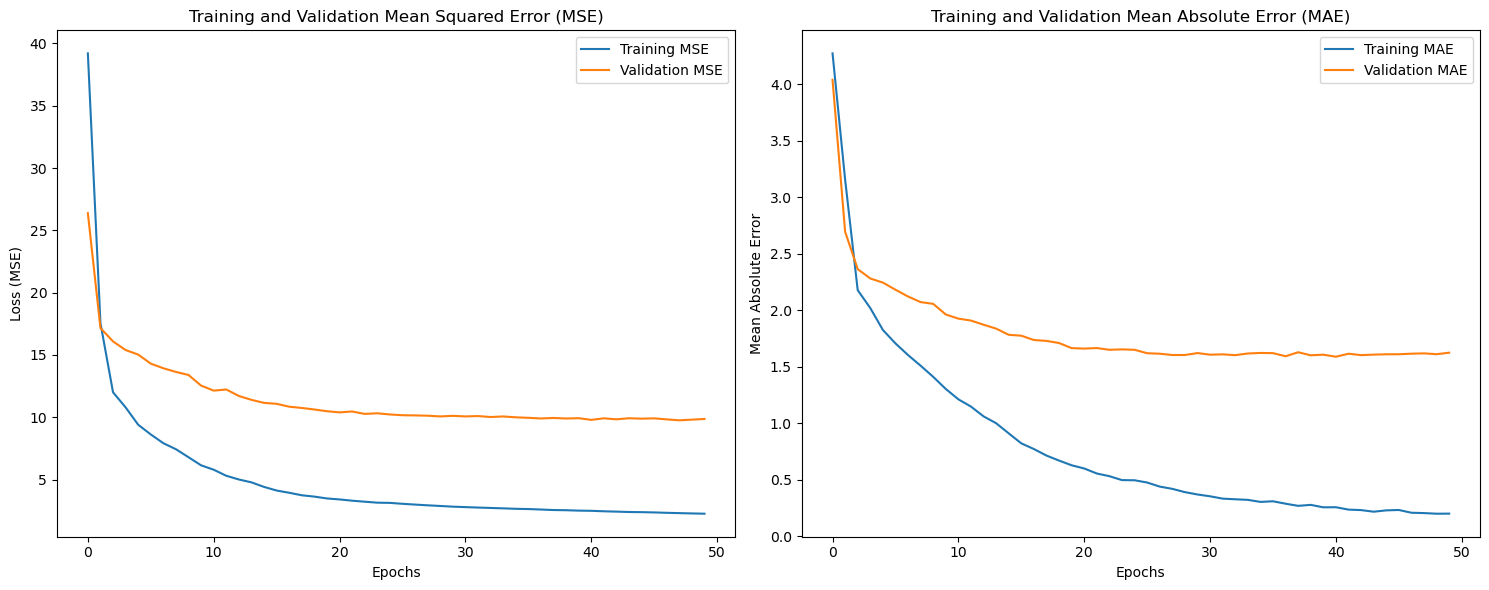

In [121]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define an MLP model
model = Sequential()
model.add(Dense(128, input_dim=100, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer size matches vector size (100)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for E, S, and G scores

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)


#Plot the training and validation loss of MSE and MAE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the training and validation loss (Mean Squared Error) on the first subplot
axes[0].plot(history.history['loss'], label='Training MSE')
axes[0].plot(history.history['val_loss'], label='Validation MSE')
axes[0].set_title('Training and Validation Mean Squared Error (MSE)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()

# Plot the training and validation MAE on the second subplot
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Training and Validation Mean Absolute Error (MAE)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

6/6 [==============================] - 0s 651us/step - loss: 9.8623 - mae: 1.6253
Test Loss (MSE): 9.8623
Test MAE: 1.6253
6/6 [==============================] - 0s 436us/step


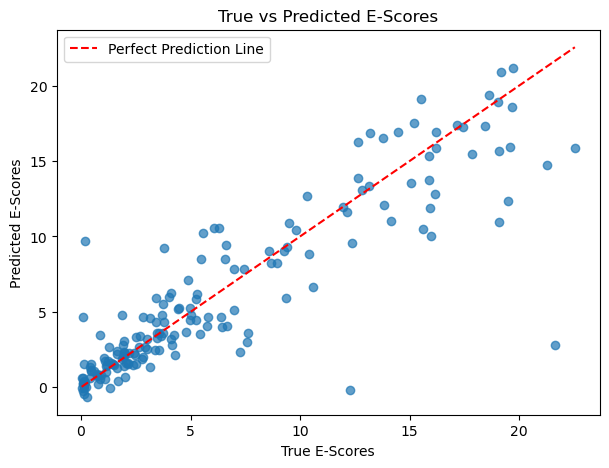

R² score: 0.7907


In [122]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Predict on the test data
y_pred = model.predict(X_test)

# Plot the true vs predicted e-scores
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction Line")  # Perfect prediction line
plt.title('True vs Predicted E-Scores')
plt.xlabel('True E-Scores')
plt.ylabel('Predicted E-Scores')
plt.legend()
plt.show()

#Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, df['s_score'], test_size=0.2, random_state=42)

# Print the shapes to confirm they are correct
print("X_train shape:", X_train.shape)  # Should be (num_samples, 100)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 100)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

#Checking Types
print("\nTypes of train and test data:\nX_train:", type(X_train), "\tX_test:", type(X_test), "\ny_train:", type(y_train), "\ty_test:", type(y_test))

#Converting y_train and y_test pandas series to 1d numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Rechecking types and shapes of y_train and y_test
print("\nRechecking types of y_train and y_test:\ny_train:", type(y_train), "\ty_test", type(y_test))
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

X_train shape: (692, 100)
X_test shape: (174, 100)
y_train shape: (692,)
y_test shape: (174,)

Types of train and test data:
X_train: <class 'numpy.ndarray'> 	X_test: <class 'numpy.ndarray'> 
y_train: <class 'pandas.core.series.Series'> 	y_test: <class 'pandas.core.series.Series'>

Rechecking types of y_train and y_test:
y_train: <class 'numpy.ndarray'> 	y_test <class 'numpy.ndarray'>
y_train shape: (692,)
y_test shape: (174,)


Epoch 1/50
11/11 [==============================] - 0s 7ms/step - loss: 84.5402 - mae: 7.9476 - val_loss: 33.7218 - val_mae: 4.7267
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 26.9690 - mae: 3.9409 - val_loss: 21.7867 - val_mae: 3.4418
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 19.6277 - mae: 3.2780 - val_loss: 15.1046 - val_mae: 2.7809
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 15.7483 - mae: 2.8488 - val_loss: 13.3995 - val_mae: 2.5733
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 13.8280 - mae: 2.6882 - val_loss: 12.9375 - val_mae: 2.4946
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 12.7232 - mae: 2.5107 - val_loss: 12.6950 - val_mae: 2.4656
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 11.7335 - mae: 2.3887 - val_loss: 12.1993 - val_mae: 2.4051
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 10.8

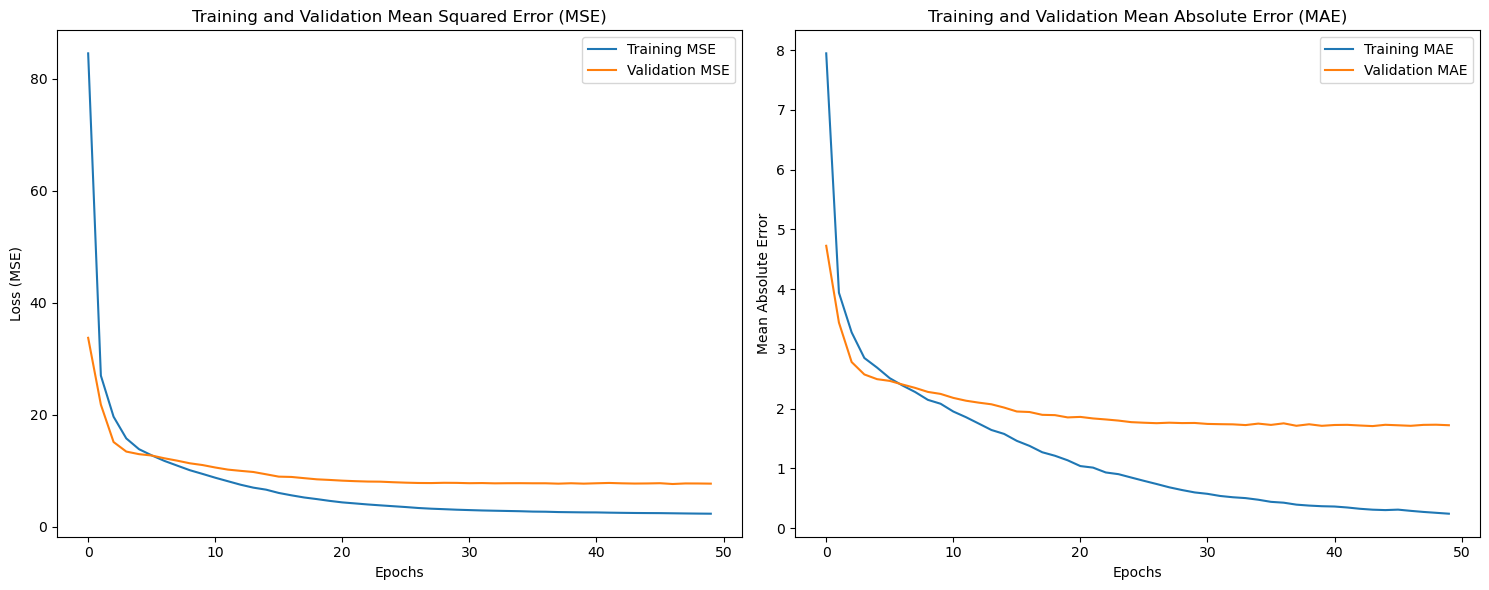

In [124]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define an MLP model
model = Sequential()
model.add(Dense(128, input_dim=100, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer size matches vector size (100)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for E, S, and G scores

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)


#Plot the training and validation loss of MSE and MAE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the training and validation loss (Mean Squared Error) on the first subplot
axes[0].plot(history.history['loss'], label='Training MSE')
axes[0].plot(history.history['val_loss'], label='Validation MSE')
axes[0].set_title('Training and Validation Mean Squared Error (MSE)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()

# Plot the training and validation MAE on the second subplot
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Training and Validation Mean Absolute Error (MAE)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

6/6 [==============================] - 0s 682us/step - loss: 7.6706 - mae: 1.7235
Test Loss (MSE): 7.6706
Test MAE: 1.7235
6/6 [==============================] - 0s 566us/step


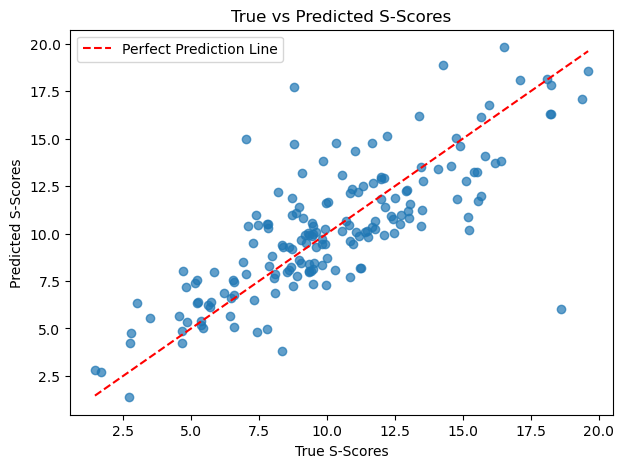

R² score: 0.5916


In [125]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Predict on the test data
y_pred = model.predict(X_test)

# Plot the true vs predicted e-scores
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction Line")  # Perfect prediction line
plt.title('True vs Predicted S-Scores')
plt.xlabel('True S-Scores')
plt.ylabel('Predicted S-Scores')
plt.legend()
plt.show()

#Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, df['g_score'], test_size=0.2, random_state=42)

# Print the shapes to confirm they are correct
print("X_train shape:", X_train.shape)  # Should be (num_samples, 100)
print("X_test shape:", X_test.shape)    # Should be (num_samples, 100)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

#Checking Types
print("\nTypes of train and test data:\nX_train:", type(X_train), "\tX_test:", type(X_test), "\ny_train:", type(y_train), "\ty_test:", type(y_test))

#Converting y_train and y_test pandas series to 1d numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Rechecking types and shapes of y_train and y_test
print("\nRechecking types of y_train and y_test:\ny_train:", type(y_train), "\ty_test", type(y_test))
print("y_train shape:", y_train.shape)  # Should be (num_samples,)
print("y_test shape:", y_test.shape)    # Should be (num_samples,)

X_train shape: (692, 100)
X_test shape: (174, 100)
y_train shape: (692,)
y_test shape: (174,)

Types of train and test data:
X_train: <class 'numpy.ndarray'> 	X_test: <class 'numpy.ndarray'> 
y_train: <class 'pandas.core.series.Series'> 	y_test: <class 'pandas.core.series.Series'>

Rechecking types of y_train and y_test:
y_train: <class 'numpy.ndarray'> 	y_test <class 'numpy.ndarray'>
y_train shape: (692,)
y_test shape: (174,)


Epoch 1/50
11/11 [==============================] - 0s 7ms/step - loss: 31.8089 - mae: 4.4606 - val_loss: 11.0643 - val_mae: 2.4001
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 12.7737 - mae: 2.6544 - val_loss: 8.5996 - val_mae: 1.9842
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 8.5041 - mae: 1.8347 - val_loss: 8.0796 - val_mae: 1.8475
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 6.8260 - mae: 1.5913 - val_loss: 7.7856 - val_mae: 1.8598
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 6.3533 - mae: 1.4985 - val_loss: 7.0690 - val_mae: 1.6853
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 5.6900 - mae: 1.3796 - val_loss: 6.7027 - val_mae: 1.6508
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 5.3469 - mae: 1.3110 - val_loss: 6.1854 - val_mae: 1.5331
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 4.9269 - mae: 1

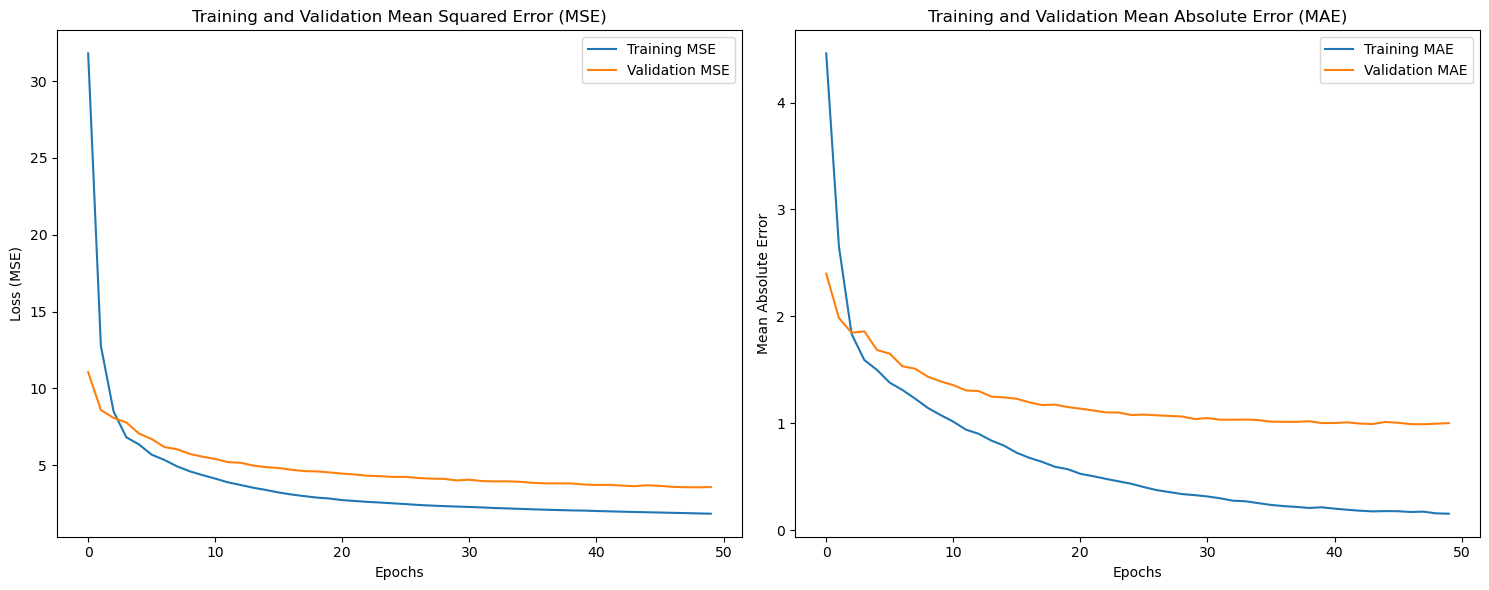

In [127]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define an MLP model
model = Sequential()
model.add(Dense(128, input_dim=100, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer size matches vector size (100)
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for E, S, and G scores

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)


#Plot the training and validation loss of MSE and MAE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the training and validation loss (Mean Squared Error) on the first subplot
axes[0].plot(history.history['loss'], label='Training MSE')
axes[0].plot(history.history['val_loss'], label='Validation MSE')
axes[0].set_title('Training and Validation Mean Squared Error (MSE)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()

# Plot the training and validation MAE on the second subplot
axes[1].plot(history.history['mae'], label='Training MAE')
axes[1].plot(history.history['val_mae'], label='Validation MAE')
axes[1].set_title('Training and Validation Mean Absolute Error (MAE)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Absolute Error')
axes[1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

6/6 [==============================] - 0s 560us/step - loss: 3.5810 - mae: 1.0013
Test Loss (MSE): 3.5810
Test MAE: 1.0013
6/6 [==============================] - 0s 576us/step


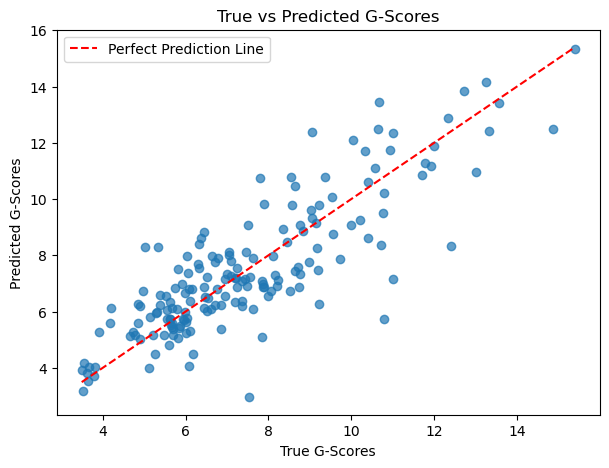

R² score: 0.6845


In [128]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Predict on the test data
y_pred = model.predict(X_test)

# Plot the true vs predicted e-scores
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Prediction Line")  # Perfect prediction line
plt.title('True vs Predicted G-Scores')
plt.xlabel('True G-Scores')
plt.ylabel('Predicted G-Scores')
plt.legend()
plt.show()

#Calculate and print R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")